In [15]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
dat = load_iris()

In [3]:
df=pd.DataFrame(dat.data,columns=dat.feature_names)

In [7]:
df['target'] = dat.target

In [8]:
df['variety'] = df.target.replace(range(3),dat.target_names)

In [9]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target variety  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa

In [10]:
df.variety.value_counts()

versicolor    50
setosa        50
virginica     50
Name: variety, dtype: int64

In [11]:
modelo = DecisionTreeClassifier()

In [13]:
var = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']

In [16]:
X = df[var].copy()
y = df['target'].copy()

In [17]:
Xt,Xv,yt,yv = train_test_split(X,y,train_size=0.7)

/home/jose/Documentos/unam/repos/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [19]:
modelo.fit(Xt,yt)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
print(accuracy_score(y_true=yt,y_pred = modelo.predict(Xt)))
print(accuracy_score(y_true=yv,y_pred = modelo.predict(Xv)))

1.0
0.9555555555555556


In [42]:
param_grid = dict(criterion = ['gini','entropy'],
splitter = ['best','random'],
max_depth = range(1,10))

In [43]:
param_grid

{'criterion': ['gini', 'entropy'],
 'splitter': ['best', 'random'],
 'max_depth': range(1, 10)}

In [44]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [45]:
grid = GridSearchCV(param_grid=param_grid,scoring='accuracy',verbose=True,
                    cv=10,
                    n_jobs=-1,
                    estimator=modelo)

In [46]:
%%time
grid.fit(X,y)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


CPU times: user 462 ms, sys: 8.28 ms, total: 470 ms
Wall time: 1.01 s


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    1.0s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=48,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=True)

In [47]:
grid.best_score_

0.9733333333333334

In [48]:
modelo = grid.best_estimator_

In [49]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'splitter': 'random'}

In [51]:
modelo.fit(Xt,yt)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')

In [52]:
print(accuracy_score(y_true=yt,y_pred = modelo.predict(Xt)))
print(accuracy_score(y_true=yv,y_pred = modelo.predict(Xv)))

0.9714285714285714
0.9777777777777777


In [53]:
import pickle

In [54]:
pickle.dump(modelo,open('modelo_arbol.md','wb'))

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
print(confusion_matrix(y_true=yt,y_pred = modelo.predict(Xt)))
print(confusion_matrix(y_true=yv,y_pred = modelo.predict(Xv)))

[[39  0  0]
 [ 0 35  1]
 [ 0  2 28]]
[[11  0  0]
 [ 0 13  1]
 [ 0  0 20]]


In [59]:
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler

In [60]:
sc = MinMaxScaler()

In [61]:
sc.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [62]:
Xs = pd.DataFrame(sc.transform(X),columns=X.columns)

In [63]:
Xs.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            0.428704          0.440556           0.467458   
std             0.230018          0.181611           0.299203   
min             0.000000          0.000000           0.000000   
25%             0.222222          0.333333           0.101695   
50%             0.416667          0.416667           0.567797   
75%             0.583333          0.541667           0.694915   
max             1.000000          1.000000           1.000000   

       petal width (cm)  
count        150.000000  
mean           0.458056  
std            0.317599  
min            0.000000  
25%            0.083333  
50%            0.500000  
75%            0.708333  
max            1.000000

In [64]:
mds = MDS(n_components=2)

In [65]:
Xm = pd.DataFrame(mds.fit_transform(Xs),columns=['d1','d2'])

In [67]:
Xm['variety'] = df['variety'] 

In [71]:
Xm['predict'] = modelo.predict(X)

In [68]:
Xm.head()

d1        d2 variety
0 -0.630427 -0.127054  setosa
1 -0.540624 -0.331612  setosa
2 -0.609831 -0.291528  setosa
3 -0.575940 -0.336726  setosa
4 -0.658056 -0.110121  setosa

In [69]:
import seaborn as sns
%matplotlib inline

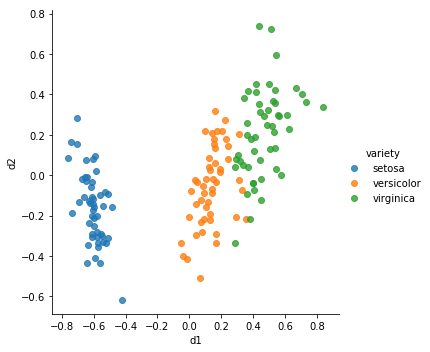

In [70]:
sns.lmplot(data=Xm,x='d1',y='d2',hue='variety',fit_reg=False)

In [72]:
sns.lmplot(data=Xm,x='d1',y='d2',hue='predict',fit_reg=False)